For this example I am going to use the classic Boston housing dataset.  The dataset was created by writing the dataset from R MASS package

In [15]:
# http://www.stat.columbia.edu/~gelman/research/published/priors11.pdf

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pymc3 import summary, traceplot
from pymc3_models.models.LinearRegression import LinearRegression
import seaborn as sns 

df = pd.read_csv('data/boston.csv')

Look at the first few rows:

In [16]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


multicolinearity is present!

In [17]:
#https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif = vif.set_index(df.columns)
vif.T


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
VIF Factor,2.131404,2.910004,14.485874,1.176266,74.004269,136.101743,21.398863,15.430455,15.36998,61.939713,87.227233,21.351015,12.615188,24.503206


We can see this in the clustermap:

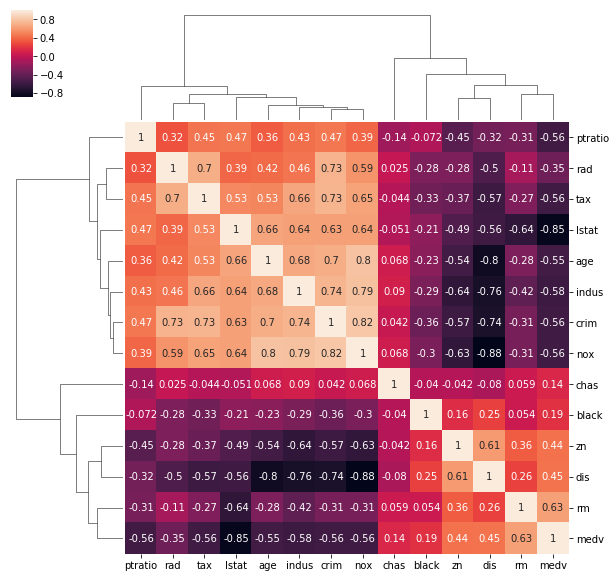

In [18]:
sns.clustermap(df.corr(method = 'spearman'), annot = True)
plt.show()

Classic OLS regrssion often fails when multicolinearity is present.  Frequentists will often use regularization (l1, l2, elastic net) to shrink the weights of cofficients towards 0 to deal wih issue and improve predictive performance.  

In the presence of many correlated variables (or many variables in general) bayesians regularize with the prior they put on the coefficient.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('medv', 1)
y = np.log(df['medv'])

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression().fit(X_train, y_train, minibatch_size=100)

LR.score(X_test, y_test)

/anaconda3/envs/Main/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/Main/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/envs/Main/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/Main/lib/python3.6/site-packages/pymc3/data.py:244: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a dif

0.8045994994869881

In [22]:
import pymc3_models
print(pymc3_models.__file__)

/anaconda3/envs/Main/lib/python3.6/site-packages/pymc3_models/__init__.py
